In [1]:
%load_ext autoreload
%autoreload 2
from sbrnet_core.sbrnet.models.model import SBRNet
from sbrnet_core.config_loader import load_config
import torch


In [2]:
from pandas import read_parquet

p = '/ad/eng/research/eng_research_cisl/jalido/sbrnet/data/training_data/UQ/1/metadata.pq'

df = read_parquet(p)
df[df['sbr']<1.15]


,num_views,view_combo,psf_path,lens_apodized_path,mla_apodized_path,gt_folder,value_path,sbr,sbr_range,stack_scat_path,rfv_scat_path,stack_free_path,rfv_free_path,gt_path
80,1,[4],/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,1.120967,1.1-3.0,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...
162,1,[4],/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,1.120094,1.1-3.0,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...
192,1,[4],/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,1.148183,1.1-3.0,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...
226,1,[4],/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,1.143458,1.1-3.0,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...
229,1,[4],/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,1.135918,1.1-3.0,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...
230,1,[4],/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,1.124672,1.1-3.0,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...
365,1,[4],/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,1.143775,1.1-3.0,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...
375,1,[4],/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_cisl/jalido/sbrn...,/ad/eng/research/eng_research_c

uint16 65534 0 65535


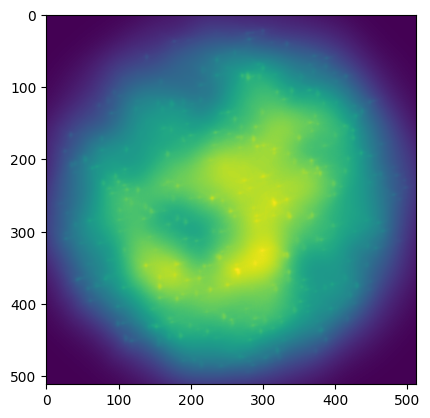

In [8]:
from tifffile import imread
import matplotlib.pyplot as plt
p = df.iloc[80].stack_scat_path
a = imread(p)
print(a.dtype,a.max(),a.min(),0xFFFF)
plt.imshow(a[0])

In [25]:
import os
from tifffile import imread
import numpy as np
from sbrnet_core.sbrnet.dataset import CustomDataset, MySubset
import torch


In [31]:
path = "/ad/eng/research/eng_research_cisl/jalido/sbrnet/data/training_data/dataset0/"
dataset = CustomDataset(path)
train_dataset = MySubset(dataset, is_val=False)

index, stack, rfv, gt = train_dataset[365]

tensor(nan)

In [8]:
path = "/ad/eng/research/eng_research_cisl/jalido/sbrnet/data/training_data/dataset0/"
index = 365
rfv = imread(os.path.join(path, f"stackbg/meas_{index}.tiff")).astype(
            np.float32
        )
print(rfv.max(), rfv.min())
# rfv = (rfv - rfv.min()) / (rfv.max() - rfv.min())
# rfv = torch.from_numpy(rfv)

254.0 0.0


In [3]:
#testing remote server NVIDIA GPU is seen
torch.cuda.is_available()

True

# quick test

In [ ]:
stack = torch.zeros(2,9,224,224).cuda()
rfv = torch.zeros(2,24,224,224).cuda()
config = load_config("/projectnb/tianlabdl/jalido/sbrnet_proj/configs/config_train.yaml")
m = SBRNet(config).cuda()
out = m(stack,rfv)
# for name, module in m.named_children():
#     print(f"Name: {name}, Module: {module}")